

### 1) Exploratory Data Analysis (EDA)

To determine which variables impact employee retention, we analyze the mean values of numerical features grouped by the `left` column. We look for significant differences between employees who stayed (0) and those who left (1).

**Findings:**

* **Satisfaction Level:** Significantly lower for those who left (0.44 vs 0.66).
* **Average Monthly Hours:** Higher for those who left.
* **Promotion:** Employees promoted in the last 5 years are much more likely to stay.
* **Salary:** (Analyzed in the next step) High earners are less likely to leave.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Loading the dataset
# Changed read_csv to read_excel because the file is an .xlsx file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HR_comma_sep 1.xlsx')
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [8]:
# Group by 'left' to see differences in averages
print("Average values for employees who stayed vs. left:")
analysis = df.groupby('left').mean(numeric_only=True)
print(analysis)

Average values for employees who stayed vs. left:
      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


### 2) Impact of Employee Salaries on Retention

We use a bar chart to visualize the relationship between salary levels (low, medium, high) and employee turnover.

**Explanation:** This chart clearly shows that employees with high salaries are the least likely to leave, while those with low and medium salaries have much higher attrition rates.

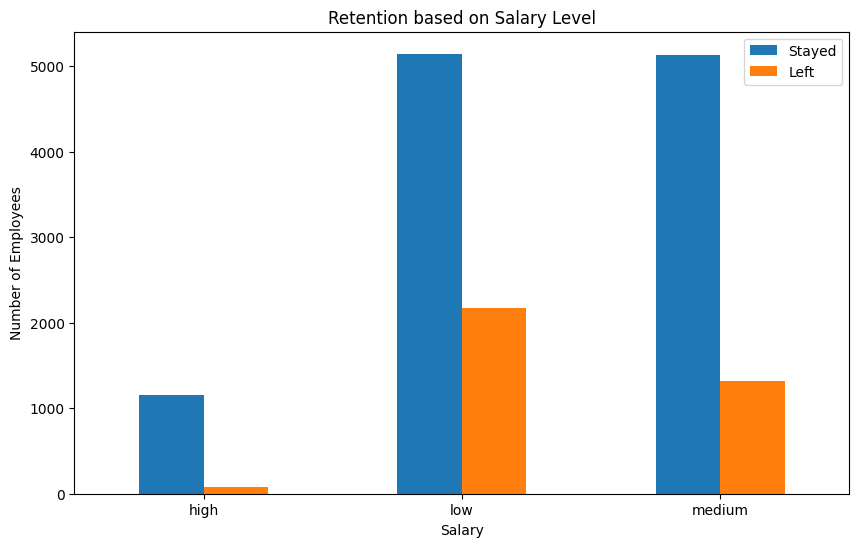

In [9]:
# Bar chart for Salary impact
pd.crosstab(df.salary, df.left).plot(kind='bar', figsize=(10, 6))
plt.title('Retention based on Salary Level')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=0)
plt.show()

### 3) Correlation Between Department and Employee Retention

We visualize whether certain departments have a higher tendency for employees to leave.

**Explanation:** While some departments like Sales and Support show a high number of departures, this is often due to the larger size of those departments. The chart helps identify if specific areas are outliers in turnover.

In [ ]:
# Bar chart for Department impact
pd.crosstab(df.Department, df.left).plot(kind='bar', figsize=(12, 6))
plt.title('Retention based on Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()

### 4) Build Logistic Regression Model

Based on our EDA, we select the variables with the most direct impact: `satisfaction_level`, `average_montly_hours`, `promotion_last_5years`, and `salary`. Since `salary` is text-based, we convert it into "dummy variables" (0s and 1s) so the model can process it.

In [10]:
# 1. Feature Selection
sub_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]

# 2. Handling Categorical Data (Salary)
salary_dummies = pd.get_dummies(sub_df.salary, prefix="salary")
df_with_dummies = pd.concat([sub_df, salary_dummies], axis='columns')
df_with_dummies.drop('salary', axis='columns', inplace=True)

# 3. Defining X (features) and y (target)
X = df_with_dummies
y = df['left']

# 4. Splitting the data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Build and Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 5) Model Accuracy

Finally, we evaluate how well our model predicts whether an employee will leave or stay by comparing its predictions against the actual test data.

**Explanation:** The accuracy score represents the percentage of correct predictions. An accuracy of ~77% suggests the model is fairly effective at identifying turnover risks based on the chosen factors.

In [ ]:
# Calculate Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")

# Showing the impact (coefficients) of each variable
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nModel Coefficients:")
print(importance.sort_values(by='Coefficient'))